# GRIP : The Spark Foundation

### Data Science Business Analytics Intern - November, 2022 [#GRIPNOV22]

### Author : Varsha S Thambi

### TASK 2 : Prediction Using Unsupervised Machine Learning

In this task it is required to predict the optimum number of cluster for the iris data set.

### Importing the dataset

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

# For ML Model
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\Iris.csv")

In [7]:
df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analyss

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Check if an invoice number is missing
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no null value in the given data set.

In [10]:
df.shape

(150, 6)

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
# Now we will drop id
iris=pd.DataFrame(df)
iris=iris.drop(columns=["Id"])
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Frequency of the Species

In [16]:
irisFreq = pd.crosstab(index=iris["Species"],  columns="count")      
irisFreq

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### Visualization

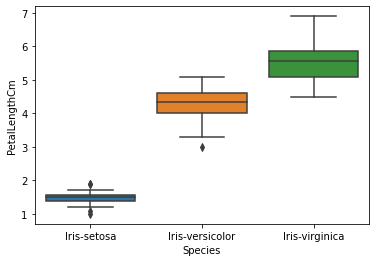

In [17]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

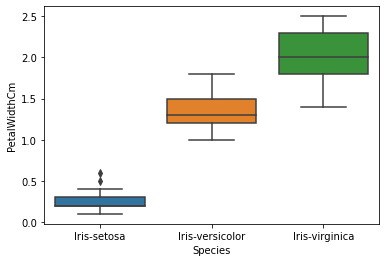

In [18]:
sns.boxplot(x="Species",y="PetalWidthCm",data=iris)
plt.show()

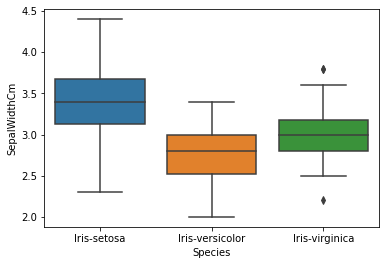

In [19]:
sns.boxplot(x="Species",y="SepalWidthCm",data=iris)
plt.show()

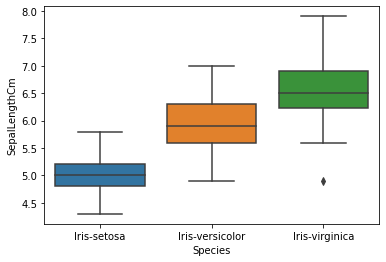

In [20]:
sns.boxplot(x="Species",y="SepalLengthCm",data=iris)
plt.show()

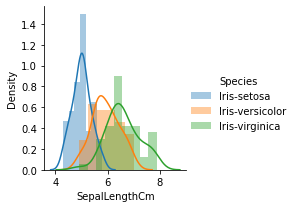

In [28]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

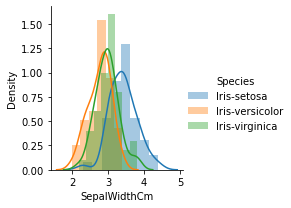

In [29]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

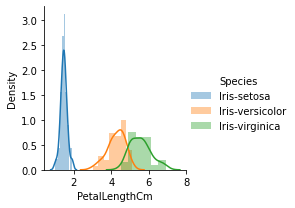

In [31]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()

### Finding the optimum number of clusters

In [27]:
x = iris.iloc[:, [0,1,2,3]].values
x[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Model Fitting

In [22]:
fitted = []

for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    fitted.append(km.inertia_)

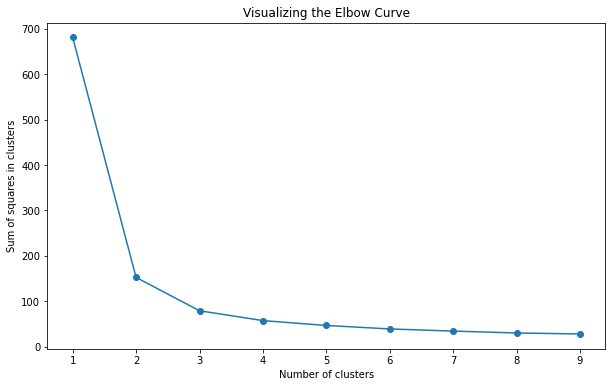

In [23]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), fitted, marker='o')
plt.title('Visualizing the Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares in clusters') #within cluster sum of squares
plt.show()

Based on the above graph we choose the number of clusters as 3

### Training

In [24]:
# Creating the kmeans classifier
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = km.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Predicting the Optimum Clusters

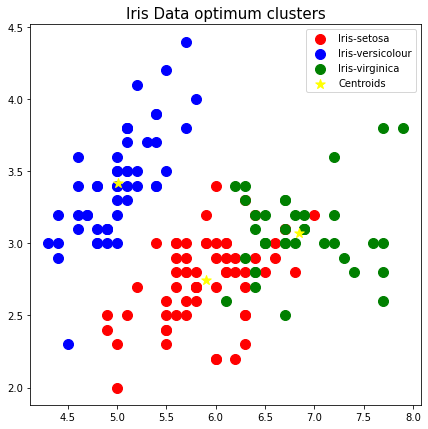

In [32]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids',
            marker='*')
plt.title("Iris Data optimum clusters", fontsize=15)
plt.legend()
plt.show()
